In [1]:
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis

## Data import

In [2]:
preprocessed_data_path = '../../10x_datasets/Preprocessed_data/'

nucleus_dataset_p4g4 = pd.read_csv(preprocessed_data_path + 'clean_10x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth = pd.read_csv(preprocessed_data_path + 'clean_10x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps = pd.read_csv(preprocessed_data_path + 'clean_10x_CD86_TCPS_nucleus_dataset.csv')
all_surfaces = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

# 20x CD86 P4G4+TCPS+Smooth data

## Train XGBClassifier

c:\_\jupyter_3\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\_\jupyter_3\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\_\jupyter_3\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder i

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8207840636834376
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8373434810714894


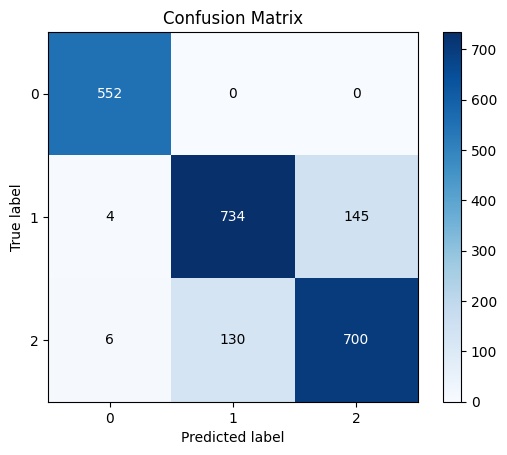

In [3]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces, confusion_matrix=True)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9999451990118959
AUC score for M2 0.947942402276755
AUC score for NT 0.9479535868496074
Average AUC 0.9652803960460862


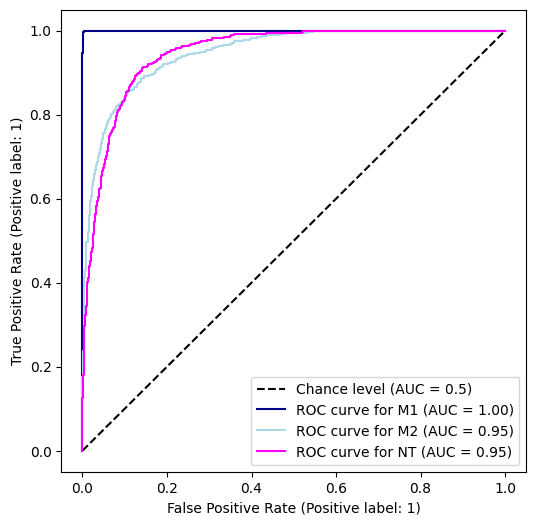

In [4]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

## Get the most important features

<AxesSubplot:ylabel='Feature'>

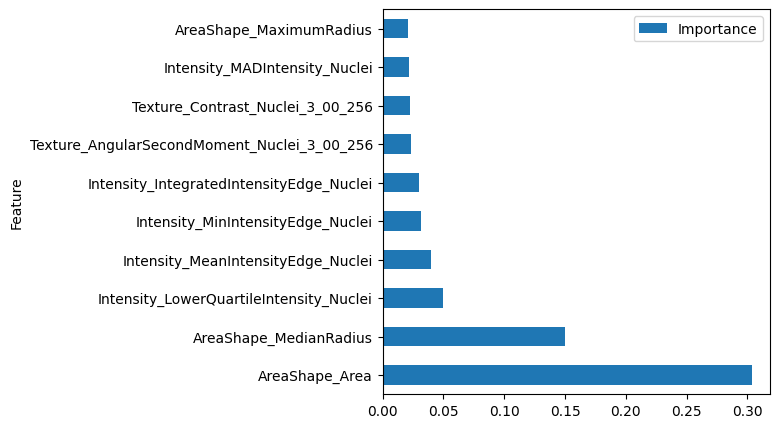

In [5]:
important_features_smooth = macrophages_analysis.get_best_features(pipe, all_surfaces.drop('CellType', axis=1), 10)
important_features_smooth.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))   

# 20x CD86 P4G4+TCPS+Smooth data without intestity features

In [6]:
nucleus_dataset_p4g4 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_smooth = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_tcps = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset_no_intensity_data.csv')
all_surfaces_no_intensity = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

FileNotFoundError: [Errno 2] No such file or directory: '../../10x_datasets/Preprocessed_data/clean_20x_CD86_P4G4_nucleus_dataset_no_intensity_data.csv'

## Train XGBClassifier

In [ ]:
pipe_no_intensity, test_data_no_intensity = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_intensity, confusion_matrix=True)

## One-vs-Rest multiclass ROC

In [ ]:
macrophages_analysis.make_multiclass_roc(pipe_no_intensity, test_data_no_intensity)

## Get the most important features

In [ ]:
important_features_smooth = macrophages_analysis.get_best_features(pipe_no_intensity, all_surfaces_no_intensity.drop('CellType', axis=1), 10)
important_features_smooth.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))

# 20x CD86 P4G4+TCPS+Smooth data without shape features

In [ ]:
nucleus_dataset_p4g4 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_smooth = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_tcps = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset_no_shape_data.csv')
all_surfaces_no_shape = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

## Train XGBClassifier

In [ ]:
pipe_no_shape, test_data_no_shape = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_shape, confusion_matrix=True)

## One-vs-Rest multiclass ROC

In [ ]:
macrophages_analysis.make_multiclass_roc(pipe_no_shape, test_data_no_shape)

## Get the most important features

In [ ]:
important_features_tcps = macrophages_analysis.get_best_features(pipe_no_shape, all_surfaces_no_shape.drop('CellType', axis=1), 10)
important_features_tcps.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))